# Project : Gold Price Prediction 

# 1) Data Collection :

In [1]:
# Importing Relevant Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importing CSV data file into dataframe

In [6]:
df = pd.read_csv("/Users/ajaygarasiya/Library/Containers/com.microsoft.Excel/Data/Desktop/ML/gld_price_data.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


# 2) Data Processing

In [7]:
# Dataframe structure

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# No. of rows and columns

In [11]:
df.shape

(2290, 6)

In [17]:
# Cheaking null values

In [20]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# Discribe the numerical columns

In [14]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


***Data Discription***

This is gold price dataset. The dataset gives you information about a gold prices based on several other stock prices.

***Feature***

* Date = mm/dd/yyyy
* SPX = It is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchangers in the United States
* USO = United States Oil Fund 
* SLV = Silver Price
* EUR/USD = Currency pair quotation of the Euro against the US

***Label***

* GLD = Gold Price

# 3) Correlation between features

In [21]:
# There are two types of correlation:
# 1) Positive Correlation
# 2) Negative Correlation

In [23]:
correlation = df.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [25]:
# Constructing the heatmap to understand the correlation

<AxesSubplot:>

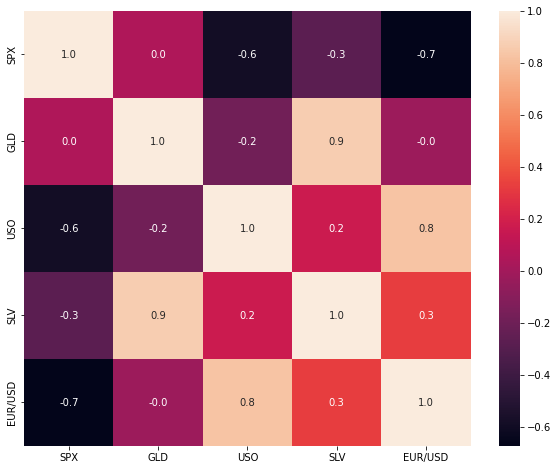

In [36]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation, annot = True,fmt = '.1f', annot_kws = {'size':10})

In [37]:
# Correlation Values of Gold

In [39]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [40]:
# Cheacking the distribution of GLD prices

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

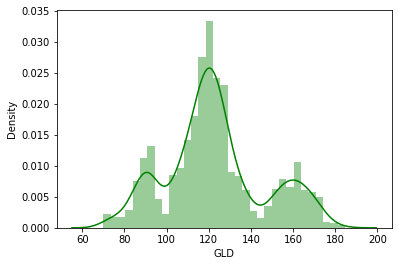

In [163]:
# Histogram
sns.distplot(df['GLD'], color = 'green')

# 4) Spliting the features and targets

In [47]:
X = df.drop(['Date','GLD'],axis = 1)
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [49]:
y = df['GLD']
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# 5) Spliting the dataset into Training and Testing Data

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 50)

In [64]:
len(X_train)

1832

In [65]:
len(X_test)

458

# 6) Model Selection

In [91]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
rf_model.score(X_train,y_train)

0.9985946498603475

In [92]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [93]:
lr_model.score(X_train,y_train)

0.8773046274182081

In [94]:
# Decision Tree Regression Model
from sklearn import tree
t_model = tree.DecisionTreeRegressor()
t_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [95]:
t_model.score(X_train,y_train)

1.0

In [96]:
# K Nearest Neighbors Model
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [97]:
knn_model.score(X_train,y_train)

0.9381778771364513

In [98]:
# Support Vector Regression Model
from sklearn.svm import SVR
svr_model = SVR(kernel = 'rbf')
svr_model.fit(X_train, y_train)

SVR()

In [99]:
svr_model.score(X_train,y_train)

0.11329958391598649

From this 5 models, Decision Tree Regression model and Random Forest Regression model secures highest score and Support Vector Regression model secures lowest score.

So, We will use Random Forest Regression Model.

# 7) Applying the Random Forest Regression Model

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
rf_model.score(X_train,y_train)

0.9986511163102577

In [107]:
rf_model.predict(X_test)

array([109.17560025, 116.9657016 , 150.29960148, 127.73190214,
       123.08669826, 125.14470211, 120.22339949,  74.47640064,
       106.41600075,  93.98860015, 117.67330034, 170.23169979,
       102.92630032,  94.66790064, 163.6389034 ,  88.24120031,
       125.73699917, 150.1429014 ,  92.95520084, 155.88379944,
       128.68960182,  91.05959842, 108.25010039, 125.09089908,
       159.82079643,  75.86840139, 124.48030008, 143.57449982,
       116.41619845, 126.9313998 , 141.35299778,  95.48049943,
       102.22920043, 135.73039879, 113.99689865,  91.48909893,
       115.12390183, 167.36779999,  89.50260026, 167.11580067,
       128.10140035, 122.29489972, 149.00299795,  87.22739945,
       117.10260047, 134.52640028, 154.48680197,  84.33819985,
       114.43860011, 105.91950045, 122.95240091, 137.71749998,
       120.52149943, 124.93099952, 116.44179875, 126.52319948,
        93.70540158, 118.79439989,  97.92459945,  91.26810132,
       167.04109881, 125.78390013, 121.2964004 , 121.45

# 8) Error Calculation

In [157]:
# R Squared Error
from sklearn import metrics
y_predicted = list(rf_model.predict(X_test))
error_score = metrics.r2_score(y_test,y_predicted)
print("R Squared error : ", error_score)

R Squared error :  0.9895133614520566


# 9) Compare the actual values and predicted values

In [158]:
y_test = list(y_test)

In [159]:
y_predicted = list(rf_model.predict(X_test))

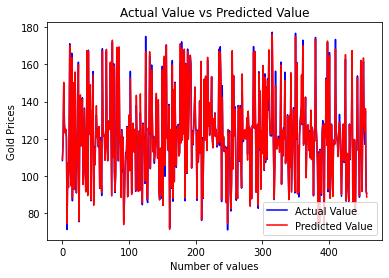

In [160]:
plt.plot(y_test,color = 'blue', label = 'Actual Value' )
plt.plot(y_predicted, color = 'red', label = 'Predicted Value')

plt.title("Actual Value vs Predicted Value")
plt.xlabel("Number of values")
plt.ylabel("Gold Prices")
plt.legend()
plt.show()

